In [1]:
%%capture
# downloading MASSIVE dataset
!wget https://amazon-massive-nlu-dataset.s3.amazonaws.com/amazon-massive-dataset-1.1.tar.gz && tar -xvf amazon-massive-dataset-1.1.tar.gz

In [2]:
import pandas as pd
# reading in the English set
df = pd.read_json("/content/1.1/data/en-US.jsonl", lines=True)

# Dropping non QA set entries
df = df[df['intent'].str.contains('qa')]

In [3]:
# Peak at dataset
df.head()

,id,locale,partition,scenario,intent,utt,annot_utt,worker_id
652,681,en-US,train,qa,qa_stock,keep me updated on stock market prices,keep me updated on [news_topic : stock market ...,407
1737,1801,en-US,train,qa,qa_factoid,what is the gross domestic product of us,what is the gross domestic product of [place_n...,127
2894,2995,en-US,test,qa,qa_stock,please tell me news related to the stock market,please tell me news related to the [news_topic...,263
2895,2996,en-US,train,qa,qa_stock,what's new with the stock market,what's new with the [news_topic : stock market],263
2896,2997,en-US,train,qa,qa_stock,what are some updates about the stock market,what are some updates about the [news_topic : ...,263


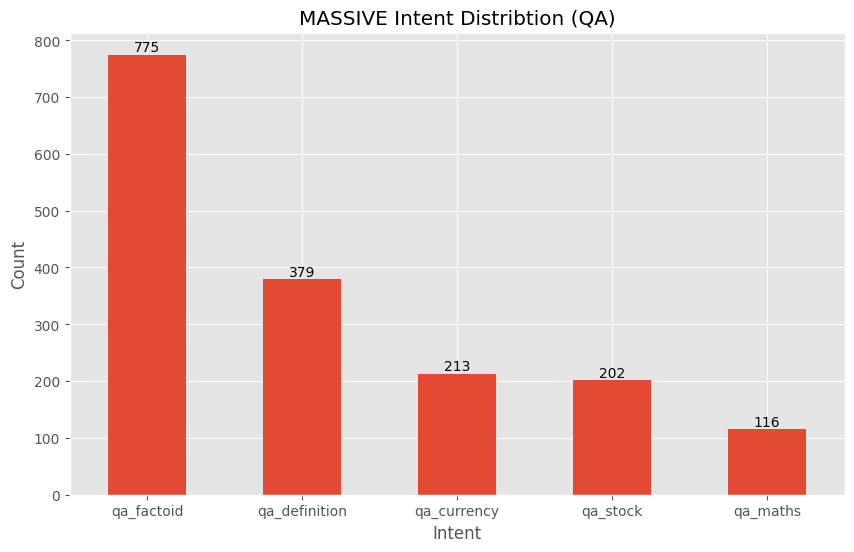

In [7]:
import matplotlib.pyplot as plt

# Code snippet to plot the counts for each unique QA intent type

intent_counts = df['intent'].value_counts()


plt.style.use('ggplot')

plt.figure(figsize=(10, 6))  
bar_plot = intent_counts.plot(kind='bar')


plt.xlabel('Intent')
plt.ylabel('Count')
plt.title('MASSIVE Intent Distribtion (QA)')

bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=0) 
for p in bar_plot.patches:
    bar_plot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


# Examples
Here we print 10 examples for each QA type to get an idea of what the questions are like.

In [10]:
for qa_type in df['intent'].unique():
  print(f'Intent: {qa_type}')
  print(df[df['intent'] == qa_type]['utt'].head(10))
  print()

Intent: qa_stock
652                keep me updated on stock market prices
2894      please tell me news related to the stock market
2895                     what's new with the stock market
2896         what are some updates about the stock market
4522         what are the current stock prices for google
4571        set notification for news on the stock market
4572    turn on notification for all news on the stock...
4573     notify me of the latest news on the stock market
4776           send me the stock market updates for today
6408                                 stock exchange rates
Name: utt, dtype: object

Intent: qa_factoid
1737              what is the gross domestic product of us
4656                                        when is sunset
4802           who won the presidential election this year
4803               tell me about martin luther king junior
5054     who was appointed as deputy centimeter of utta...
8836                where is the convention center located
8846